In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Step 1: Generate Synthetic Data
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for temperature (in Celsius), humidity (in %), and CO ppm levels
temperature = np.random.normal(loc=25, scale=5, size=500)  # Mean=35°C, Std=5°C
humidity = np.random.normal(loc=50, scale=10, size=500)    # Mean=50%, Std=10%
ppm = np.random.normal(loc=200, scale=50, size=500)        # Mean=300 ppm, Std=50 ppm

# Create a DataFrame
df = pd.DataFrame({'temperature': temperature, 'humidity': humidity, 'ppm': ppm})

# Display the first few rows of the synthetic data
print("First few rows of the generated data:")
print(df.head())

# Save the generated data to a CSV file
csv_file_name = 'synthetic_aq_data.csv'
df.to_csv(csv_file_name, index=False)
print(f"Synthetic data saved to {csv_file_name}")

# Step 2: Download the CSV file
# from google.colab import files
# files.download(csv_file_name)


First few rows of the generated data:
   temperature   humidity         ppm
0    27.483571  59.261775  269.967772
1    24.308678  69.094166  246.231684
2    28.238443  36.014324  202.981518
3    32.615149  55.629692  167.653161
4    23.829233  43.493574  234.911166
Synthetic data saved to synthetic_aq_data.csv


First few rows of the loaded data:
   temperature   humidity         ppm
0    27.483571  59.261775  269.967772
1    24.308678  69.094166  246.231684
2    28.238443  36.014324  202.981518
3    32.615149  55.629692  167.653161
4    23.829233  43.493574  234.911166


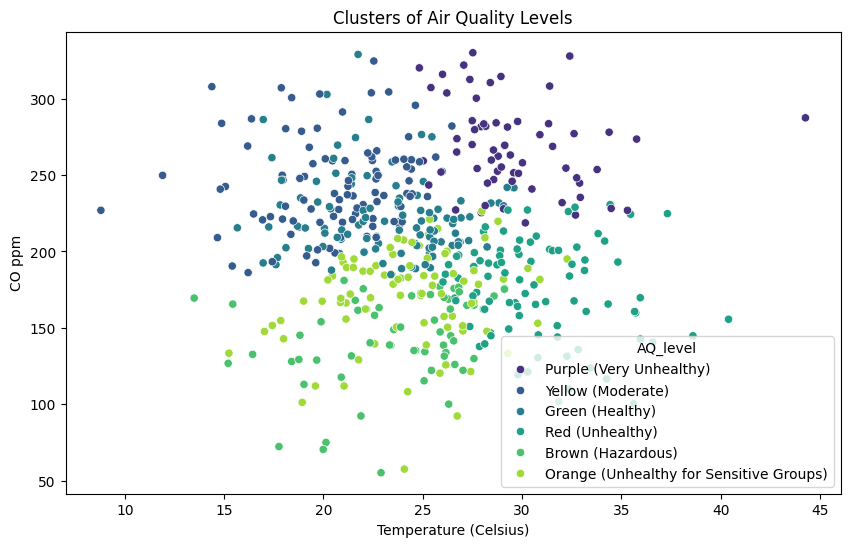

Cluster Centers (in standardized scale):
[[-0.38383894 -0.80170227  0.33852434]
 [-0.91573081  0.70106176  0.75450055]
 [-0.18006765  1.02562104 -0.70490157]
 [ 1.15806987 -0.25917792 -0.57113468]
 [ 0.92996087  0.15997571  1.24943428]
 [-0.31518312 -0.93752889 -1.26185396]]


In [7]:
# Unsupervised Learning - Clustering with KMeans

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
# Load the synthetic data from the CSV file
df = pd.read_csv('synthetic_aq_data.csv')

# Display the first few rows of the dataset
print("First few rows of the loaded data:")
print(df.head())

# Step 2: Data Preprocessing
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['temperature', 'humidity', 'ppm']])

# Step 3: Apply KMeans Clustering
# Apply KMeans clustering with 6 clusters for the AQI categories
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Map the clusters to AQ levels based on AQI categories
# Note: This mapping is arbitrary and should be adjusted based on cluster center analysis
df['AQ_level'] = df['cluster'].map({
    0: 'Green (Healthy)', 
    1: 'Yellow (Moderate)', 
    2: 'Orange (Unhealthy for Sensitive Groups)', 
    3: 'Red (Unhealthy)', 
    4: 'Purple (Very Unhealthy)', 
    5: 'Brown (Hazardous)'
})

# Step 4: Visualize the Clusters
# Plot clusters to visualize the AQ levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temperature'], y=df['ppm'], hue=df['AQ_level'], palette='viridis')
plt.title('Clusters of Air Quality Levels')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('CO ppm')
plt.show()

# Display the cluster centers
print("Cluster Centers (in standardized scale):")
print(kmeans.cluster_centers_)


In [12]:
# Supervised Learning - Classification with Random Forest

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare Data for Supervised Learning
# Features and target variable
X = df[['temperature', 'humidity', 'ppm']]
y = df['AQ_level']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Supervised Learning Model
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the AQ levels on the test set
y_pred = clf.predict(X_test)

# Step 3: Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred, labels=[
    'Green (Healthy)', 'Yellow (Moderate)', 'Orange (Unhealthy for Sensitive Groups)', 
    'Red (Unhealthy)', 'Purple (Very Unhealthy)', 'Brown (Hazardous)'
],)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Green (Healthy)', 'Yellow (Moderate)', 'Orange (Unhealthy for Sensitive Groups)', 
                         'Red (Unhealthy)', 'Purple (Very Unhealthy)', 'Brown (Hazardous)'],
            yticklabels=['Green (Healthy)', 'Yellow (Moderate)', 'Orange (Unhealthy for Sensitive Groups)', 
                         'Red (Unhealthy)', 'Purple (Very Unhealthy)', 'Brown (Hazardous)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Visualize Feature Importances (Optional)
# Visualize which features are most important in the model
importances = clf.feature_importances_
feature_names = ['temperature', 'humidity', 'ppm']

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Classification Report:
                                         precision    recall  f1-score   support

                      Brown (Hazardous)       0.89      0.89      0.89         9
                        Green (Healthy)       0.95      0.95      0.95        22
Orange (Unhealthy for Sensitive Groups)       0.88      0.75      0.81        20
                Purple (Very Unhealthy)       0.88      1.00      0.94        15
                        Red (Unhealthy)       0.87      0.87      0.87        15
                      Yellow (Moderate)       0.85      0.89      0.87        19

                               accuracy                           0.89       100
                              macro avg       0.89      0.89      0.89       100
                           weighted avg       0.89      0.89      0.89       100

Confusion Matrix:


TypeError: got an unexpected keyword argument 'k'

In [11]:
clf.predict([[25, 50, 500]])  # Example prediction for temperature=25°C, humidity=50%, CO ppm=200

C:\Users\azwri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Purple (Very Unhealthy)'], dtype=object)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the synthetic dataset
num_entries = 1000  # Number of data entries
device_id = 101  # Device ID for the dataset
start_date = datetime(2024, 9, 1, 0, 0, 0)  # Start date for timestamps

# Generate timestamps every 5 minutes
timestamps = [start_date + timedelta(minutes=5 * i) for i in range(num_entries)]

# Generate synthetic data
temperatures = np.random.uniform(15, 35, num_entries)  # Temperature between 15°C and 35°C
humidity = np.random.uniform(20, 90, num_entries)  # Humidity between 20% and 90%
ppm = np.random.uniform(0, 500, num_entries)  # PPM between 0 and 500

# Determine AQI categories based on ppm values
aqi_categories = [
    "Green (Healthy)" if ppm_value <= 50 else
    "Yellow (Moderate)" if ppm_value <= 100 else
    "Orange (Unhealthy for Sensitive Groups)" if ppm_value <= 150 else
    "Red (Unhealthy)" if ppm_value <= 200 else
    "Purple (Very Unhealthy)" if ppm_value <= 300 else
    "Brown (Hazardous)" 
    for ppm_value in ppm
]

# Create a DataFrame
df = pd.DataFrame({
    "device_id": device_id,
    "timestamp": timestamps,
    "temperature": temperatures,
    "humidity": humidity,
    "ppm": ppm,
    "aqi": aqi_categories
})

# Save the DataFrame to a CSV file
df.to_csv('air_quality_synthetic_data.csv', index=False)

print("Synthetic dataset saved as 'air_quality_synthetic_data.csv'.")


Synthetic dataset saved as 'air_quality_synthetic_data.csv'.


In [8]:
import pandas as pd

# Assuming your CSV file is named 'air_quality_data.csv'
df = pd.read_csv('air_quality_synthetic_data.csv')

# Check the first few rows
print(df.head())


   device_id            timestamp  temperature   humidity         ppm  \
0        101  2024-09-01 00:00:00    22.490802  32.959305  130.852842   
1        101  2024-09-01 00:05:00    34.014286  57.933066  123.489400   
2        101  2024-09-01 00:10:00    29.639879  81.106209  453.127290   
3        101  2024-09-01 00:15:00    26.973170  71.255742  124.773100   
4        101  2024-09-01 00:20:00    18.120373  76.459280  135.974863   

                                       aqi  
0  Orange (Unhealthy for Sensitive Groups)  
1  Orange (Unhealthy for Sensitive Groups)  
2                        Brown (Hazardous)  
3  Orange (Unhealthy for Sensitive Groups)  
4  Orange (Unhealthy for Sensitive Groups)  


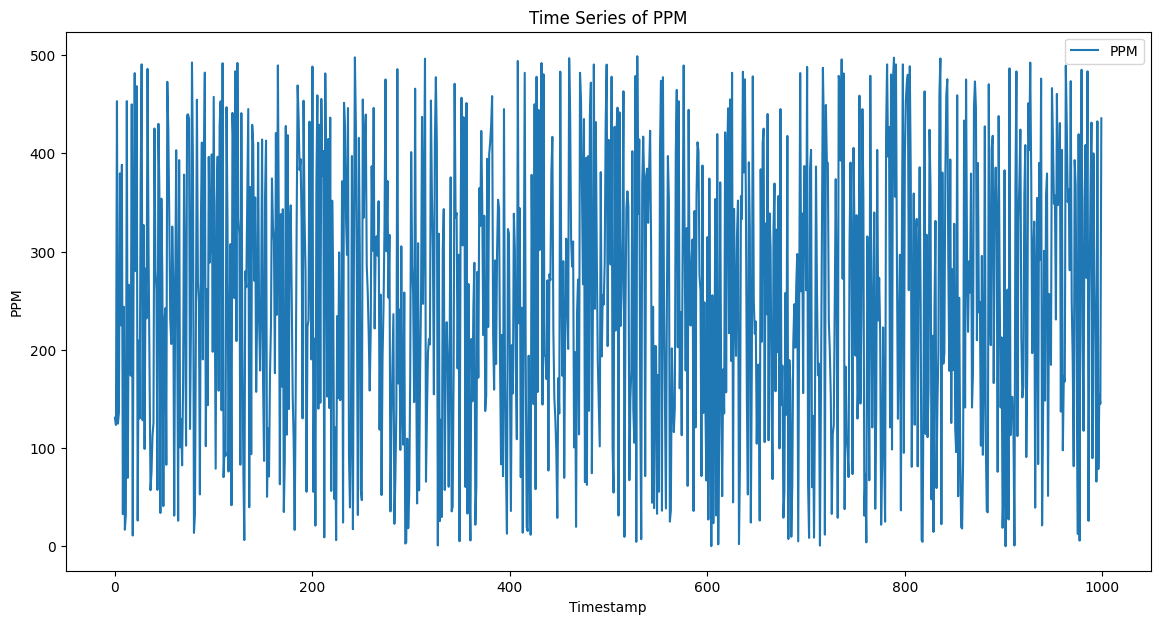

In [9]:
import matplotlib.pyplot as plt

# رسم البيانات الزمنية لمؤشر AQI
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['ppm'], label='PPM')
plt.xlabel('Timestamp')
plt.ylabel('PPM')
plt.title('Time Series of PPM')
plt.legend()
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# تحجيم البيانات
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['ppm', 'temperature', 'humidity']])

# تحويل البيانات إلى مصفوفة
X = []
y = []

# ضبط حجم النافذة الزمنية (مثلاً 60 خطوة زمنية)
window_size = 60

for i in range(window_size, len(df_scaled)):
    X.append(df_scaled[i-window_size:i])
    y.append(df_scaled[i, 0])  # نستخدم ppm كهدف التنبؤ

X, y = np.array(X), np.array(y)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# بناء نموذج LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # طبقة إخراج للتنبؤ بالقيمة

# تجميع النموذج
model.compile(optimizer='adam', loss='mean_squared_error')

# تدريب النموذج
model.fit(X, y, epochs=50, batch_size=32)


C:\Users\azwri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.1861
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0907
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0890
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0849
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0921
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0911
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0906
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0907
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0896
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0853
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0849
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0882
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0899
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0867
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0893
Epoc

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


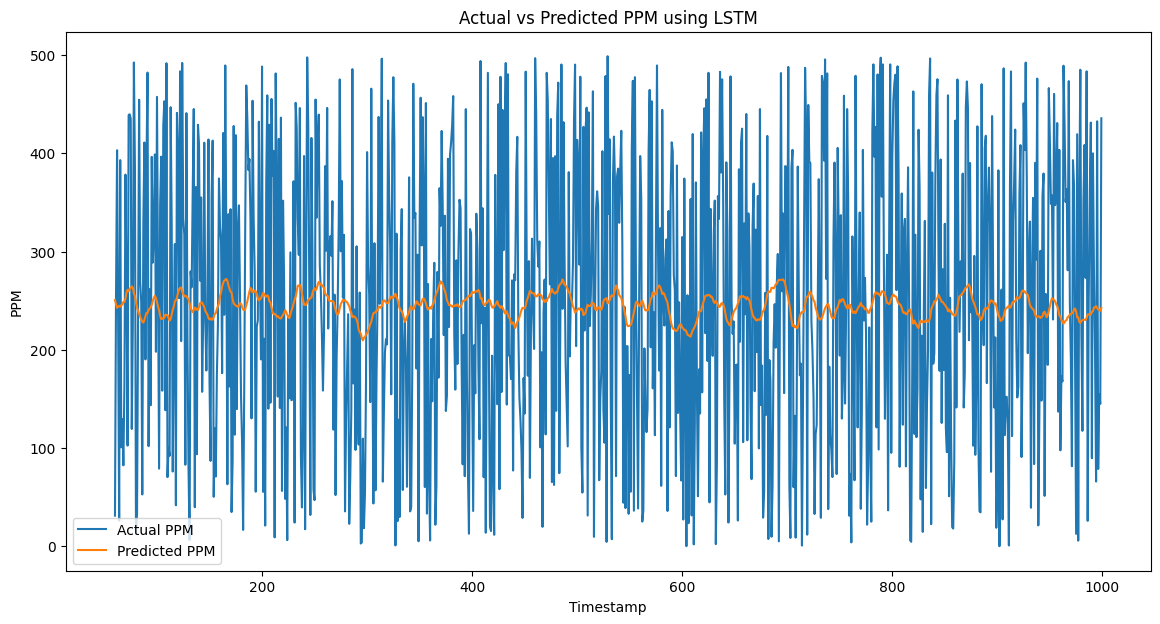

In [13]:
# التنبؤ بالقيم المستقبلية
predicted_values = model.predict(X)

# إرجاع القيم إلى المقياس الأصلي
predicted_values = scaler.inverse_transform(np.concatenate((predicted_values, np.zeros((predicted_values.shape[0], 2))), axis=1))[:, 0]

# الرسم البياني لمقارنة القيم الفعلية والمتنبأة
plt.figure(figsize=(14, 7))
plt.plot(df.index[window_size:], df['ppm'].values[window_size:], label='Actual PPM')
plt.plot(df.index[window_size:], predicted_values, label='Predicted PPM')
plt.xlabel('Timestamp')
plt.ylabel('PPM')
plt.title('Actual vs Predicted PPM using LSTM')
plt.legend()
plt.show()
